# Demo notebook for NSDAccess functionality

This notebook demonstrates the functionality of the NDSAccess class. Functionality should be relatively self-explanatory. 

All methods have docstrings, so `nsda.methodname?` should give you help on how to use. 

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import os
import os.path as op
import glob
import nibabel as nb
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import urllib.request, zipfile
from pycocotools.coco import COCO

from nsd_access import NSDAccess

%matplotlib inline

In [37]:
nsda = NSDAccess('/scratch/2019/visual/nsd/')

#### Get betas
you can read betas of different types and formats for any set of trials from a given session and subject.

In [38]:
# get the betas for a given subject, session and set of trials
betas = nsda.read_betas(subject='subj01', 
                        session_index=1, 
                        trial_index=[], # empty list as index means get all for this session
                        data_type='betas_fithrf_GLMdenoise_RR',
                        data_format='fsaverage')

print(betas.shape)

(327684, 750)


#### Behavior
You can, in a similar way, get the behavioral output for a given set of trials

In [39]:
# getting even trials till 200 for one subject and one session
beh = nsda.read_behavior(subject='subj01', 
                         session_index=1, 
                         trial_index=np.arange(0,200,2))

beh.head()

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0
6,1,1,1,7,51518,4421,0.505360,0,1.0,524.694784,0.0,NaN,NaN,0,1.0,1,0,1.0,0
8,1,1,1,9,50611,8124,0.505452,0,1.0,577.386738,0.0,NaN,NaN,0,1.0,1,0,1.0,0


#### Get pictures
Pictures from the hdf5 file, index based on the 73k format

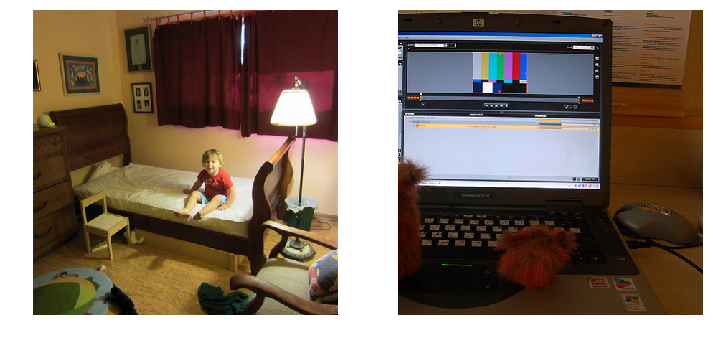

In [40]:
imgs = nsda.read_images([569, 575], show=True)

In [41]:
# Also, the stimuli have info
nsda.stim_descriptions.head(10)

,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,subject2,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,0,...,0,13720,22861,23023,0,0,0,0,0,0
5,475150,val2017,"(0, 0, 0.16640625, 0.16640625)",0.000000,5,False,False,False,0,1,...,0,0,0,0,0,0,0,0,0,0
6,554328,val2017,"(0, 0, 0.11015625, 0.11015625)",0.000000,6,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
7,438269,val2017,"(0.16484375, 0.16484375, 0, 0)",0.000000,7,False,False,False,0,0,...,0,0,0,0,0,0,0,11767,19544,29069
8,8211,val2017,"(0, 0, 0.14140625, 0.14140625)",0.000000,8,False,False,False,0,0,...,22809,0,0,0,0,0,0,0,0,0
9,327701,val2017,"(0, 0, 0.165625, 0.165625)",0.000000,9,False,False,False,0,0,...,0,0,0,0,0,0,0,13481,17352,25765


#### Get annotation info
you can also get different types of annotation info. Notice that the cropping for the fMRI experiment has shifted the annotations somewhat, this needs to be fixed


Indexing is based on the 73k format again.

In [ ]:
ci = nsda.read_image_coco_info(569, info_type='captions', show_annot=True)
pi = nsda.read_image_coco_info(569, info_type='person_keypoints', show_annot=True, show_img=True)

#### Get rois and/or mapper data
you can also get mapper results and roi indices.

In [ ]:
# just list the available atlases for a given subject/data format - returns a list of names
# will, for surfaces, mix both mapper results and atlas data.
atlases = nsda.list_atlases(subject='subj01', data_format='func1pt8mm');
# similar functionality should be created for mapper data when fsaverage mapper results exist.
atlases

In [ ]:
# get surface-based or volume-based atlas values and their mapping
# for now, demoing volume for lack of surface mapper results

atlas = 'HCP_MMP1'
mmp1, atlas_mapping = nsda.read_atlas_results(subject='subj01', 
                               atlas=atlas, 
                               data_format='func1pt8mm')
plt.hist(mmp1.ravel(), 
         range=[0,int(np.max(mmp1))+1],
         bins=int(np.max(mmp1))+1, 
         alpha=0.4, 
         cumulative=True, 
         label='both hemispheres');

# or, only get the right hemisphere
mmp1_rh, atlas_mapping_rh = nsda.read_atlas_results(subject='subj01', 
                               atlas=f'rh.{atlas}', 
                               data_format='func1pt8mm')
plt.hist(mmp1_rh.ravel(), 
         range=[0,int(np.max(mmp1))+1],
         bins=int(np.max(mmp1))+1, 
         alpha=0.4, 
         color='r', 
         cumulative=True, 
         label='right hemisphere only');
plt.gca().set_xlabel('labels')
plt.gca().set_ylabel('# of vertices/voxels')
plt.legend()

# easy to make, for example, V1 mask:
v1_mask = (mmp1 == atlas_mapping['V1'])
# or rh V1 mask
v1_mask_rh = (mmp1_rh == atlas_mapping_rh['V1'])

# print(atlas_mapping)

In [ ]:
prf_polar_angle, prf_ecc, prf_size, prf_rsq = (nsda.read_mapper_results(subject='subj01', 
                                           mapper='prf', 
                                           data_type=dt, 
                                           data_format='func1pt8mm') for dt in ('angle', 'eccentricity', 'size', 'R2'))

floc_faces_t = nsda.read_mapper_results(subject='subj01', 
                                        mapper='floc', 
                                        data_type='facestval', 
                                        data_format='func1pt8mm')

# but, these mapper data are not yet available for fsaverage
# nsda.read_mapper_results(subject='subj01', mapper='prf', data_type='angle', data_format='fsaverage')

In [ ]:
# convert to cartesian and [0,1] rsq for alphas
v1_x, v1_y = (np.sin(np.radians(prf_polar_angle[v1_mask]))*prf_ecc[v1_mask], 
              np.cos(np.radians(prf_polar_angle[v1_mask]))*prf_ecc[v1_mask])
v1_rsq = prf_rsq[v1_mask]/100
v1_rsq[v1_rsq<0] = 0

# coloring for rsq
rgba_colors = np.zeros((v1_x.shape[0], 4))
rgba_colors[:,2] = 1.0 # make blue
rgba_colors[:,3] = v1_rsq # the rsq is alpha

# plot
f, s = plt.subplots(1, 2, figsize=(24,12))
s[0].scatter(v1_x, v1_y, s=100*prf_size[v1_mask], color=rgba_colors) # this size is made up - beware.
s[0].set_title('V1 pRFs in visual field')
s[0].set_xlim([-8.4,8.4])
s[0].set_ylim([-8.4,8.4])
s[0].axvline(0, -15, 15, c='k', lw=0.25)
s[0].axhline(0, -15, 15, c='k', lw=0.25)
s[0].set_xlabel('horizontal space [dva]')
s[0].set_ylabel('vertical space [dva]')
s[1].set_title('V1 pRF size vs eccentricity')
s[1].set_xlim([0,8.4])
s[1].set_ylim([0,4.4])
s[1].set_xlabel('pRF eccentricity [dva]')
s[1].set_ylabel('pRF size [dva]')
s[1].scatter(prf_ecc[v1_mask], prf_size[v1_mask], s=100*v1_rsq, color=rgba_colors);  # this size is made up - beware.

### Caveats

- I still need to test this latest functionality for the single-subject surface space formats. 
- There are no fsaverage mapper results yet - these still need to be transformed to fsaverage space for direct mapping between mappers and betas